<a href="https://colab.research.google.com/github/dynamodenis/Google-Deep-Learning-LLM-Models/blob/main/NeuralNetwork/Hyperparameters_gdm_lab_3_5_tune_hyperparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> <p><small><small>This Notebook is made available subject to the licence and terms set out in the <a href = "http://www.github.com/google-deepmind/ai-foundations">AI Research Foundations Github README file</a>.

<img src="https://storage.googleapis.com/dm-educational/assets/ai_foundations/GDM-Labs-banner-image-C3-white-bg.png">

# Lab: Tune Hyperparameters

<a href='https://colab.research.google.com/github/google-deepmind/ai-foundations/blob/master/course_3/gdm_lab_3_5_tune_hyperparameters.ipynb' target='_parent'><img src='https://colab.research.google.com/assets/colab-badge.svg' alt='Open In Colab'/></a>

Optimize hyperparameters to avoid overfitting.

15 minutes

## Overview

When you train a model, it adjusts its parameters such that it learns the patterns in the training data. However, in order for it to do this most effectively, you, as a model developer, have to find the best settings of the model and the training process. For example, you have to decide how many layers the model should have and for how long the model should be trained. These types of parameters that are configured before a model begins training are called **hyperparameters**. In this lab, you will explore how changing two types of hyperparameters affects how well the model can learn and generalize.




### What you will learn:

By the end of this lab, you will:
* Understand how changing the number of layers of a model and changing the number of neurons within a layer affects model training.


### Tasks

In this lab, you will again use the dataset from the previous labs in which the classifier aims to predict the next token from the three words "mat", "apple", and "bank". You will then train models with different hyperparameters and investigate their learning behavior thorugh inspecting the learning curves, their accuracy, and their decision boundaries.

**In this lab, you will**:
* Load the dataset of 2-dimensional embeddings.
* Intialize different MLP models.
* Train the models and plot the learning curve and decision boundary.

All of these steps are described in detail in the following sections.

## How to use Google Colaboratory (Colab)

Google Colaboratory (also known as Google Colab) is a platform that allows you to run Python code in your browser. The code is written in *cells* that are executed on a remote server.

To run a cell, hover over a cell and click on the `run` button to its left. The run button is the circle with the triangle (▶). Alternatively, you can also click on a cell and use the keyboard combination Ctrl+Return (or ⌘+Return if you are using a Mac).

To try this out, run the following cell. This should print today's day of the week below it.

In [ ]:
from datetime import datetime

print(f"Today is {datetime.today():%A}.")

Note that the order in which you run the cells matters. When you are working through a lab, make sure to always run all cells in order, otherwise the code might not work. If you take a break while working on a lab, Colab may disconnect you and in that case, you have to execute all cells again before  continuing your work. To make this easier, you can select the cell you are currently working on and then choose __Runtime → Run before__  from the menu above (or use the keyboard combination Ctrl/⌘ + F8). This will re-execute all cells before the current one.

## Imports

In this lab, you will primarily use functions from the custom `ai_foundations` package for training the model and for creating plots.

Run the following cell to import all required packages.

In [1]:
%%capture
# Install the custom package for this course.
!pip install "git+https://github.com/google-deepmind/ai-foundations.git@main"

import os # For adjusting Keras settings.
os.environ['KERAS_BACKEND'] = 'jax' # Set a parameter for Keras.

# Packages used.
import jax.numpy as jnp # For defining matrices.
import keras # For adjusting Keras settings.
import pandas as pd # For loading the dataset.

from ai_foundations import machine_learning # For defining and training MLPs.
from ai_foundations import visualizations # For visualizing data and boundaries.
from ai_foundations import training # For logging the loss during training.

## Load the dataset

Run the following cell to load the dataset and prepare the `jax.Arrays` with the training and test data. Note that the data here is manually split into a training set and a test set such that the most challenging examples (all outliers) appear in the test set. This will make it easier to see some of the differences that come from training models with different hyperparameters.

In [2]:
# Load data using pandas.
df = pd.read_csv("https://storage.googleapis.com/dm-educational/assets/ai_foundations/mat-apple-bank-dataset.csv")

# Extract embeddings (Embedding_dim_1, Embedding_dim_2) and labels.
X = jnp.array(df[["Embedding_dim_1", "Embedding_dim_2"]].values)
# Labels: 0 ("mat"), 1 ("apple"), or 2 ("bank").
y = jnp.array(df["Label"].values)

# Human-readable labels.
labels = ["mat", "apple", "bank"]

# Manually split the data.
X_train, X_test, y_train, y_test = X[0:61, :], X[61:, :], y[0:61], y[61:]

## Optimizing hyperparameters

-----
> **💻 Your task:**
>
>As mentioned above, you will experiment here with networks that differ in terms of:
> * the number of layers
> * the dimensions of each layer (how many neurons there are in each layer)
>
>In general, the more layers you add and the larger the hidden layer dimensions are, the more likely the model will overfit.
>
>On the other hand, if you use very few hidden layers (e.g., just one) with a very low dimension (e.g., just 2 neurons), the model will likely not learn a good decision function and underfit.
>
>Importantly, you will keep everything but the number of layers and the dimensions of the layers constant in this exercise. For example, the number of epochs will be the same across all runs. This allows you to directly attribute any differences in model performance to the hyperparameters that you change.
>
>Use the cells below to define different network structures by changing `hidden_dims`.
>
>Then:
>1. Visualize the structure of the network to get a sense of what it looks like.
>2. Train the network on the dataset.
>3. Visualize the decision boundary and observe the train and test accuracies. Recall that the accuracy is defined as the percentage of examples for which the model makes the correct predictions. The train accuracy indicates whether the model learned something — low train accuracy suggests **underfitting**. The test accuracy indicates whether the model is able to generalize — low test accuracy in combination with high train accuracy suggests **overfitting**.
>
>
>Repeat these three steps with at least three network configurations, that is three different settings of `hidden_dims`.
>
>Make sure to train:
>1. one network with only one layer and a very low number of neurons
>2. one network that has at least three layers and the first layer has more than 1,000 neurons
>3. one network with settings somewhere in between
>
>Which ones of these seem to suffer from overfitting? Which ones from underfitting? Can you find settings for which the model seems to generalize well?
-----

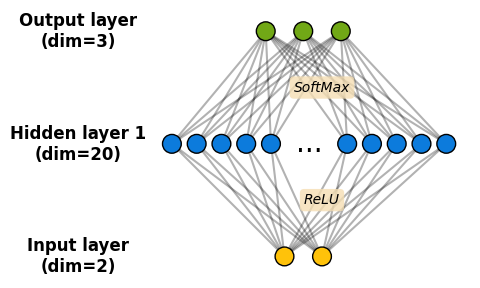

Epoch 19: Training loss: 0.57203, training accuracy: 78.69%, test loss: 0.66728, test accuracy: 75.00%
Epoch 39: Training loss: 0.32353, training accuracy: 90.16%, test loss: 0.46286, test accuracy: 83.33%
Epoch 59: Training loss: 0.19210, training accuracy: 98.36%, test loss: 0.32881, test accuracy: 100.00%
Epoch 79: Training loss: 0.10843, training accuracy: 100.00%, test loss: 0.24770, test accuracy: 100.00%
Epoch 99: Training loss: 0.06120, training accuracy: 100.00%, test loss: 0.20300, test accuracy: 91.67%
Epoch 119: Training loss: 0.03769, training accuracy: 100.00%, test loss: 0.17929, test accuracy: 91.67%
Epoch 139: Training loss: 0.02549, training accuracy: 100.00%, test loss: 0.16502, test accuracy: 91.67%
Epoch 159: Training loss: 0.01844, training accuracy: 100.00%, test loss: 0.15583, test accuracy: 91.67%
Epoch 179: Training loss: 0.01405, training accuracy: 100.00%, test loss: 0.15069, test accuracy: 91.67%
Epoch 199: Training loss: 0.01112, training accuracy: 100.00%

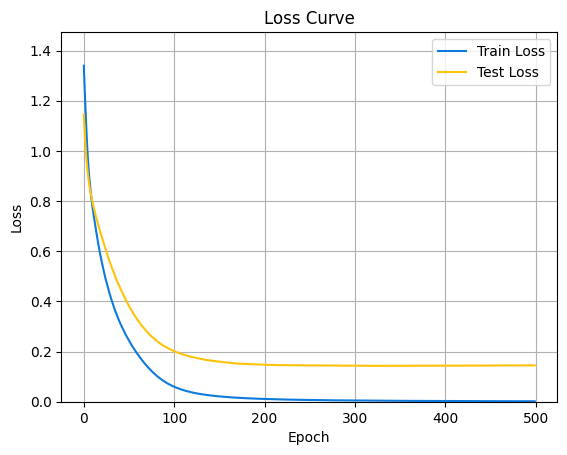

Train accuracy: 100.00%
Test accuracy: 91.67%


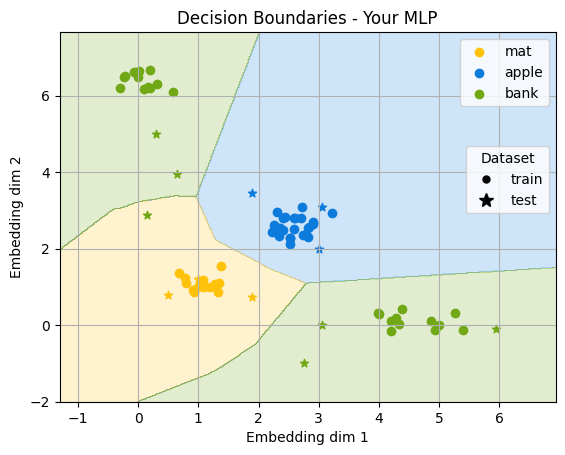

In [13]:
# Set the number of hidden layers and their dimensions here.
# Each number indicates the number of neurons per layer. For example, setting
# this to `[20, 10]` will initialze an MLP with two hidden layers of dimensions
# 20 and 10, respectively.
hidden_dims = [20, 10]

# Initialize the model and visualize its structure.
mlp_model = machine_learning.build_mlp(hidden_dims=hidden_dims, n_classes=3)
visualizations.visualize_mlp_architecture(hidden_dims, 3)

# Train the model.
training_logger = training.CustomAccuracyPrinter(print_every=20)
training_history = machine_learning.train_mlp(
    mlp_model,
    X_train,
    y_train,
    learning_rate=0.005,
    validation_data=(X_test, y_test),
    epochs=500,
    callbacks=[training_logger],
)

# Plot the loss curve.
visualizations.plot_loss_curve(training_history.history)

# Compute the accuracy and visualize the decision boundaries.
train_acc = training_history.history["accuracy"][-1]
test_acc = training_history.history["val_accuracy"][-1]

print(f"Train accuracy: {train_acc * 100:.2f}%")
print(f"Test accuracy: {test_acc * 100:.2f}%")

visualizations.plot_data_and_mlp(
    X_train,
    y_train,
    labels,
    features_test=X_test,
    label_ids_test=y_test,
    mlp_model=mlp_model,
    title="Decision Boundaries - Your MLP",
)

### What did you observe?

You likely noticed that when you trained a network with a single hidden layer with very few neurons that it had both a low training and test accuracy. This is a classic sign of **underfitting**. The model did not have enough capacity to learn complex enough decision boundaries and therefore was not able to separate the data points.

When you trained a network with multiple layers, at least one of which was very large, you probably noticed that the decision boundary was a really complex shape and the test accuracy was lower than the train accuracy (though probably still quite high, since this dataset is not too complex). This indicates **overfitting**. The model has so many parameters that instead of only learning useful patterns from the training data (the signal), it also learned patterns specific to these training examples (the noise). This hindered its ability to generalize to examples in the test set.

Finally, when you specified a model with a more reasonable number of parameters (e.g., a layer of 10 neurons and a layer of 5 neurons), you likely observed that it managed to learn a decision boundary that worked well for both the examples in the training set and the examples in the held-out test set. A model such as this is better able to generalize.



## Summary
In this activity, you explored how the size of your neural network affects learning.

You changed two hyperparameters:

* The number of hidden layers
* The number of neurons in each layer

By testing different model sizes, you saw three possible outcomes:

- Underfitting: Small models could not learn enough patterns. Both training and test loss stayed high.
- Overfitting: Very large models learned patterns from the training data perfectly, but did not perform as well on the test data and they did not generalize well.
- Good: Medium-sized models learned well and worked well on new data.

You also visualized:
- Loss curves to track how the model learned over time.
- Decision boundaries to see how the model separates different classes.

In the next activity, you will learn more about additional techniques to mitigate overfitting.